In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor



df = pd.read_csv('df.csv', index_col =0)
wc = {
1:	'Clear'              ,
2:	'Fair'               ,
3:	'Cloudy'             ,
4:	'Overcast'           ,
5:	'Fog'                ,
6:	'Freezing Fog'       ,
7:	'Light Rain'         ,
8:	'Rain'               ,
9:	'Heavy Rain'         ,
10:	'Freezing Rain'      ,
11:	'Heavy Freezing Rain',
12:	'Sleet'              ,
13:	'Heavy Sleet'        ,
14:	'Light Snowfall'     ,
15:	'Snowfall'           ,
16:	'Heavy Snowfall'     ,
17:	'Rain Shower'        ,
18:	'Heavy Rain Shower'  ,
19:	'Sleet Shower'       ,
20:	'Heavy Sleet Shower' ,
21:	'Snow Shower'        ,
22:	'Heavy Snow Shower'  ,
23:	'Lightning'          ,
24:	'Hail'               ,
25:	'Thunderstorm'       ,
26:	'Heavy Thunderstorm' ,
27:	'Storm'
}

# data cleaning
df= df.drop(columns=['dwpt', 'wspd', 'count', 'weekday', 'casual', 'member'])
df.coco.value_counts()/ df.coco.value_counts().sum()
df['coco'] = df['coco'].fillna(pd.Series(np.random.choice([2.0, 3.0, 4.0, 7.0, 1.0, 8.0, 5.0, 9.0], 
                                                      p=[0.33, 0.27, 0.2, 0.07, 0.05, 0.04, 0.02,0.02], size=len(df))))

df = df.replace({"coco": wc})
df = df.rename(columns={'coco': 'wc'})
# feature engineeering
# one hot encoding - categorical data

df = pd.get_dummies(df)

X = df.drop(['total'], axis = 1)
y = df['total']



#scaler = MinMaxScaler()
#scaler.fit(X)
#X = scaler.transform(X)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<AxesSubplot:>

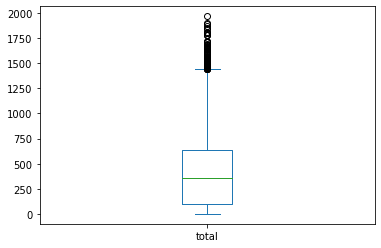

In [95]:
df.total.plot(kind = 'box')

In [96]:
y

0       256
1       153
2       127
3        66
4        14
       ... 
8754    446
8755    251
8756    236
8757    239
8758    171
Name: total, Length: 8759, dtype: int64

In [2]:
rf = AdaBoostRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_absolute_error(y_test, y_pred)


175.46290107867807

In [101]:
rf = RandomForestRegressor(max_depth=11, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_absolute_error(y_test, y_pred)


81.353325634398

In [71]:
X

,year,month,day,hour,is_weekends,temp,rhum,wc_Clear,wc_Cloudy,wc_Fair,wc_Fog,wc_Heavy Rain,wc_Heavy Rain Shower,wc_Light Rain,wc_Light Snowfall,wc_Overcast,wc_Rain,wc_Rain Shower,wc_Sleet,wc_Thunderstorm
0,2022,5,1,0,True,16.8,41.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2022,5,1,1,True,16.8,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2022,5,1,2,True,14.0,42.0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2022,5,1,3,True,12.9,47.0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2022,5,1,4,True,12.4,51.0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2023,4,30,19,True,18.5,87.0,0,0,0,0,0,0,1,0,0,0,0,0,0
8755,2023,4,30,20,True,17.4,87.0,0,0,0,0,0,0,1,0,0,0,0,0,0
8756,2023,4,30,21,True,17.4,87.0,0,0,0,0,0,0,1,0,0,0,0,0,0
8757,2023,4,30,22,True,16.8,84.0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [16]:
#mae_scores = []
train_score =[]
test_score = []

for i in range(1,50):
    rf = RandomForestRegressor(max_depth=i, random_state=42)
    rf.fit(X_train, y_train)

    # train score calculation

    train_pred = rf.predict(X_train)
    train_score.append(mean_absolute_error(y_train, train_pred))

    # test score calculation

    y_pred = rf.predict(X_test)
    test_score.append(mean_absolute_error(y_test, y_pred))
    



In [48]:
scores = pd.DataFrame(train_score, columns=['scores']).reset_index()
scores['index'] = scores['index'] + 1
scores['type'] = 'train_score'
#scores.iloc[49:,0] = list(range(1,50))
#scores.iloc[49:,1] = test_score
#scores.iloc[49:,2] = 'test_score'
#scores
xtra = {'scores': test_score}
scores = scores.append(pd.DataFrame(xtra, columns=['scores']), ignore_index=True)

scores.loc[scores.type.isna(), 'type'] = 'test_score'
scores.loc[scores['index'].isna(), 'index'] = range(1,50)


fig = px.line(scores, x="index", y="scores", color='type')
fig.show()

In [56]:
#mae_scores = []
train_score =[]
test_score = []

for i in range(5,12):
    rf = RandomForestRegressor(n_estimators=i, random_state=42)
    rf.fit(X_train, y_train)

    # train score calculation

    train_pred = rf.predict(X_train)
    train_score.append(mean_absolute_error(y_train, train_pred))

    # test score calculation

    y_pred = rf.predict(X_test)
    test_score.append(mean_absolute_error(y_test, y_pred))

In [52]:
scores = pd.DataFrame(train_score, columns=['scores']).reset_index()
scores['index'] = scores['index'] + 1
scores['type'] = 'train_score'
#scores.iloc[49:,0] = list(range(1,50))
#scores.iloc[49:,1] = test_score
#scores.iloc[49:,2] = 'test_score'
#scores
xtra = {'scores': test_score}
scores = scores.append(pd.DataFrame(xtra, columns=['scores']), ignore_index=True)

scores.loc[scores.type.isna(), 'type'] = 'test_score'
scores.loc[scores['index'].isna(), 'index'] = range(1,50)


fig = px.line(scores, x="index", y="scores", color='type')
fig.show()

In [57]:
test_score

[82.00045662100457,
 79.61520167427702,
 78.26924331376387,
 77.86201484018265,
 76.72272957889396,
 75.86849315068494,
 75.57731423827313]

In [58]:
train_score

[34.88134722420437,
 33.6902145473574,
 33.26314501824706,
 32.40604038818324,
 31.939758654044365,
 31.422948480091335,
 31.020356267109513]

Text(0.5, 1.0, 'Mean Absolute Error')

<Figure size 800x480 with 0 Axes>

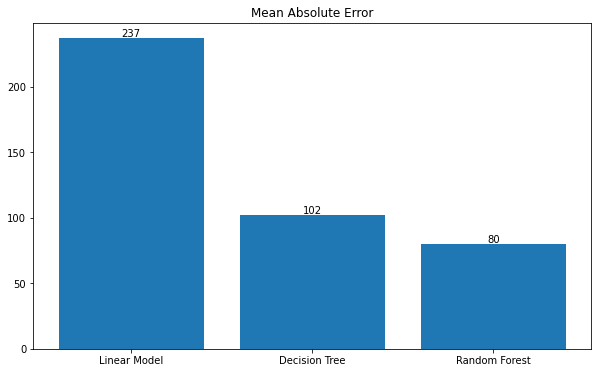

In [108]:

from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

values = [237, 102, 80 ]
indices = ['Linear Model', 'Decision Tree', 'Random Forest']

fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(indices, values)

for bars in ax.containers:
    ax.bar_label(bars)

ax.set_title('Mean Absolute Error')

In [5]:
df.to_csv('final_df.csv', index = False)

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor



df = pd.read_csv('final_df.csv', index_col =0)
df

,month,day,hour,is_weekends,temp,rhum,wc,total
year,,,,,,,,
2022,5,1,0,True,16.8,41.0,Cloudy,256
2022,5,1,1,True,16.8,40.0,Cloudy,153
2022,5,1,2,True,14.0,42.0,Cloudy,127
2022,5,1,3,True,12.9,47.0,Cloudy,66
2022,5,1,4,True,12.4,51.0,Cloudy,14
...,...,...,...,...,...,...,...,...
2023,4,30,19,True,18.5,87.0,Light Rain,446
2023,4,30,20,True,17.4,87.0,Light Rain,251
2023,4,30,21,True,17.4,87.0,Light Rain,236


In [3]:
df.describe()

,month,day,hour,temp,rhum,total
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,6.526430,15.720973,11.501085,15.562678,63.207672,426.932527
std,3.448039,8.797161,6.922233,9.075793,18.921465,369.190938
min,1.000000,1.000000,0.000000,-13.200000,12.000000,1.000000
25%,4.000000,8.000000,6.000000,7.900000,48.000000,95.500000
50%,7.000000,16.000000,12.000000,15.700000,63.000000,357.000000
75%,10.000000,23.000000,17.500000,23.500000,79.000000,634.000000
max,12.000000,31.000000,23.000000,36.300000,100.000000,1965.000000
